In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Visualization and EDA

In [4]:
data = pd.read_csv("electric_vehicles_spec_2025.csv.csv")

In [6]:
data.shape

(478, 22)

In [7]:
data.columns

Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')

In [8]:
data.segment

0       B - Compact
1       B - Compact
2      JB - Compact
3      JB - Compact
4       JC - Medium
           ...     
473      JD - Large
474    JB - Compact
475    JB - Compact
476    JB - Compact
477     B - Compact
Name: segment, Length: 478, dtype: object

In [9]:
data.segment.value_counts()

segment
JC - Medium          91
JD - Large           58
F - Luxury           51
N - Passenger Van    47
JB - Compact         44
C - Medium           34
E - Executive        30
JF - Luxury          30
B - Compact          29
JE - Executive       28
D - Large            28
A - Mini              3
JA - Mini             2
G - Sports            2
I - Luxury            1
Name: count, dtype: int64

In [10]:
data.brand.value_counts()

brand
Mercedes-Benz    42
Audi             28
Porsche          26
Volkswagen       23
Ford             22
BMW              20
Peugeot          19
Volvo            18
BYD              17
Smart            17
Kia              16
Opel             14
Hyundai          14
Skoda            12
MG               12
NIO              12
Citroen          12
Renault          11
Tesla            11
Polestar          9
XPENG             9
Zeekr             9
Fiat              8
Mini              8
Toyota            7
Nissan            6
Lotus             6
GWM               6
Genesis           5
DS                5
CUPRA             5
Abarth            4
Lucid             3
Hongqi            3
Maserati          3
Lexus             3
Alfa              2
Aiways            2
Alpine            2
Leapmotor         2
Jeep              2
Dacia             2
VinFast           2
Mazda             2
Skywell           2
Dongfeng          2
Elaris            1
Voyah             1
Cadillac          1
Maxus         

In [27]:
brands = data.brand.value_counts()

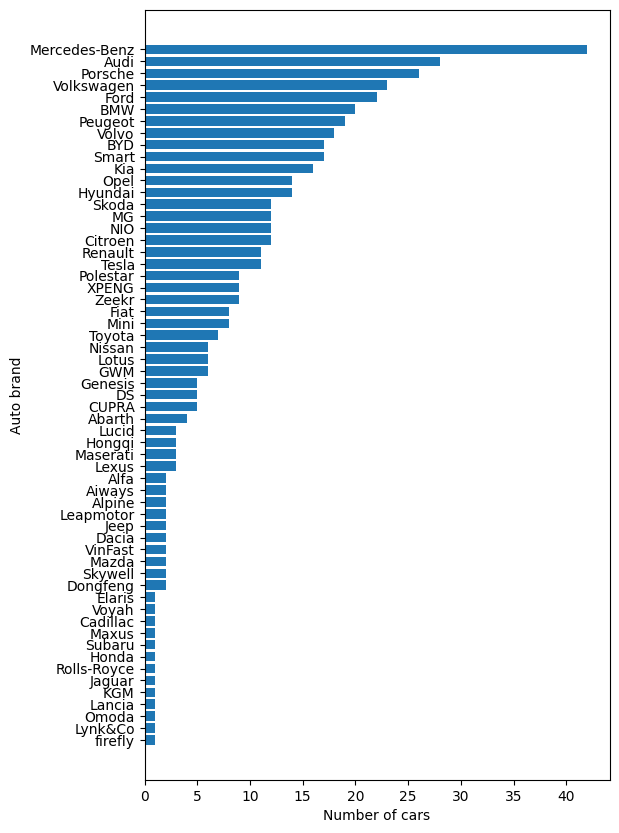

In [29]:
plt.figure(figsize=(6,10))
plt.barh(brands.index[::-1],brands[::-1])
plt.xlabel("Number of cars")
plt.ylabel("Auto brand")
plt.show()

In [31]:
data.battery_type.value_counts()

battery_type
Lithium-ion    478
Name: count, dtype: int64

From the ```battery_type.value_counts()``` we can observe that there is only one battery type. This means that the column is not going to give us any important information when it comens to further analysis so we are going to note that and drop it from the dataset

In [32]:
data = data.drop(columns=["battery_type"])

In [35]:
 data.fast_charge_port.value_counts(dropna=False)

fast_charge_port
CCS        476
CHAdeMO      1
NaN          1
Name: count, dtype: int64

In [38]:
data[data.fast_charge_port.isna()]

,brand,model,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
356,Renault,5 E-Tech 40kWh 95hp,130,40.0,93.0,215.0,129,255,12.0,NaN,...,500.0,326,5,FWD,B - Compact,3922,1808,1489,Hatchback,https://ev-database.org/car/2133/Renault-5-E-T...


We can see that the NaN car has a lithium battetry if we look it up on the internet. **It has no fast charging**

In [39]:
data.dtypes

brand                         object
model                         object
top_speed_kmh                  int64
battery_capacity_kWh         float64
number_of_cells              float64
torque_nm                    float64
efficiency_wh_per_km           int64
range_km                       int64
acceleration_0_100_s         float64
fast_charging_power_kw_dc    float64
fast_charge_port              object
towing_capacity_kg           float64
cargo_volume_l                object
seats                          int64
drivetrain                    object
segment                       object
length_mm                      int64
width_mm                       int64
height_mm                      int64
car_body_type                 object
source_url                    object
dtype: object

We can see that he cargo_valume_l is of type `object` which is not logical. We should investigate.

In [40]:
data.cargo_volume_l.value_counts()

cargo_volume_l
520    17
490    10
519    10
407    10
405     9
       ..
354     1
555     1
503     1
471     1
316     1
Name: count, Length: 140, dtype: int64

In [41]:
data.cargo_volume_l.unique()

array(['185', '360', '496', '472', '400', '326', '502', '520', '535',
       '526', '511', '10 Banana Boxes', '514', '350', '405', '470', '490',
       '570', '500', '525', '440', '345', '308', '552', '235', '385',
       '540', '793', '775', '1050', '310', '460', '380', '510', '603',
       '989', '390', '620', '467', '361', '572', '536', '519', '523', nan,
       '672', '228', '333', '354', '432', '503', '438', '280', '480',
       '401', '338', '466', '505', '355', '550', '839', '435', '475',
       '309', '210', '522', '316', '611', '509', '456', '410', '249',
       '363', '479', '453', '448', '151', '270', '31 Banana Boxes', '340',
       '495', '430', '645', '13 Banana Boxes', '828', '551', '1410',
       '1030', '555', '1390', '990', '300', '200', '579', '265', '386',
       '450', '468', '415', '819', '352', '516', '267', '434', '588',
       '412', '608', '471', '348', '407', '484', '446', '366', '367',
       '420', '950', '545', '585', '313', '323', '370', '630', '441',
   

In [47]:
data[data.cargo_volume_l.fillna("").str.contains("banana",case=False)]

,brand,model,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
29,Audi,Q6 e-tron quattro,210,94.9,180.0,855.0,176,480,5.9,200.0,...,2400.0,10 Banana Boxes,5,AWD,JD - Large,4771,1939,1685,SUV,https://ev-database.org/car/2146/Audi-Q6-e-tro...
213,Maxus,MIFA 9,180,84.0,NaN,350.0,195,365,9.2,103.0,...,1000.0,31 Banana Boxes,7,FWD,N - Passenger Van,5270,2000,1840,Small Passenger Van,https://ev-database.org/car/1837/Maxus-MIFA-9
246,Mercedes-Benz,EQS SUV 580 4MATIC,210,118.0,NaN,858.0,199,530,4.7,160.0,...,1800.0,13 Banana Boxes,7,AWD,JF - Luxury,5125,1959,1718,SUV,https://ev-database.org/car/2090/Mercedes-Benz...


We see that there are three cars that measure the cargo_valume in banana boxes

In [50]:
indicies_to_correct = data[data.cargo_volume_l.fillna("").str.contains("banana",case=False)].index

In [51]:
data["cargo_volume_corrected"] = data.cargo_volume_l.copy()

In [61]:
 data.loc[indicies_to_correct,"cargo_volume_corrected"] = np.nan

In [85]:
 data.loc[indicies_to_correct,"cargo_volume_corrected"]

29    NaN
213   NaN
246   NaN
Name: cargo_volume_corrected, dtype: float64

In [58]:
data.cargo_volume_corrected.unique()

array(['185', '360', '496', '472', '400', '326', '502', '520', '535',
       '526', '511', '10 Banana Boxes', '514', '350', '405', '470', '490',
       '570', '500', '525', '440', '345', '308', '552', '235', '385',
       '540', '793', '775', '1050', '310', '460', '380', '510', '603',
       '989', '390', '620', '467', '361', '572', '536', '519', '523', nan,
       '672', '228', '333', '354', '432', '503', '438', '280', '480',
       '401', '338', '466', '505', '355', '550', '839', '435', '475',
       '309', '210', '522', '316', '611', '509', '456', '410', '249',
       '363', '479', '453', '448', '151', '270', '31 Banana Boxes', '340',
       '495', '430', '645', '13 Banana Boxes', '828', '551', '1410',
       '1030', '555', '1390', '990', '300', '200', '579', '265', '386',
       '450', '468', '415', '819', '352', '516', '267', '434', '588',
       '412', '608', '471', '348', '407', '484', '446', '366', '367',
       '420', '950', '545', '585', '313', '323', '370', '630', '441',
   

In [69]:
data.cargo_volume_corrected = data.cargo_volume_corrected.astype(float)

Let us go through the steps we did and why we did it. I want to plot a histogram of the cargo_volume_liters. However, there are values that are nit a number and we will need to transform them to numbers of to NaN so we can plt a histogram and decide what kind of a distribution this feature has.
1. Firstly, we are creating a copy of that feature and adding it to the dataset
2. Secondly, we are finding the indexes of the samples where the feature is an object
3. Finaly, the end we locate that place and make it nan

dtype('float64')

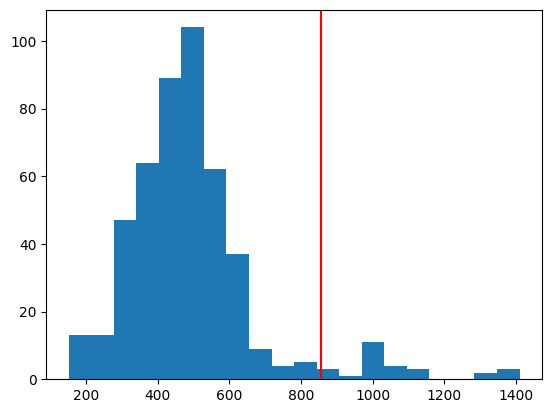

In [72]:
plt.hist(data.cargo_volume_corrected,bins =20)
plt.axvline(855,c="r")
data.cargo_volume_corrected.dtype

After doing some research we can find out the 31 banana boxes is about 855 litters. But what does that mean? Up we plotted an axvline and showed where that is

In [79]:
len(data[data.cargo_volume_corrected > data.cargo_volume_corrected.mean() + data.cargo_volume_corrected.std()])

38

In [82]:
data.cargo_volume_corrected.describe()

count     474.000000
mean      493.860759
std       187.005674
min       151.000000
25%       385.000000
50%       470.000000
75%       544.500000
max      1410.000000
Name: cargo_volume_corrected, dtype: float64

In [91]:
data.loc[indicies_to_correct,"cargo_volume_corrected"]

29    NaN
213   NaN
246   NaN
Name: cargo_volume_corrected, dtype: float64

## An often seen mistake

Something that is often mistaken is to take a categorical variable and plot its histogram. The histogram is used for continuous variables and using it on categorical features is a mistake. Let us show an example

In [93]:
data.seats.nunique()

7

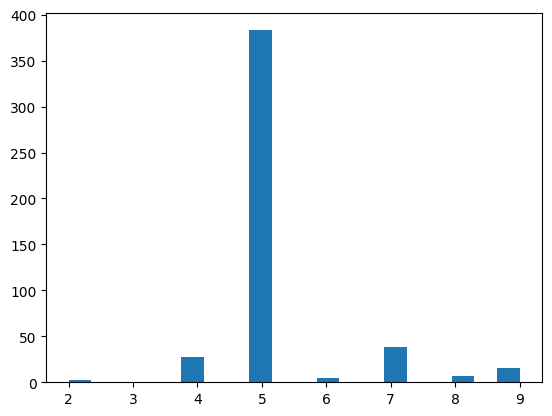

In [96]:
plt.hist(data.seats,bins = 20)
plt.show()

instead it would be good to plot a bar plot

In [97]:
seats = data.seats.value_counts()

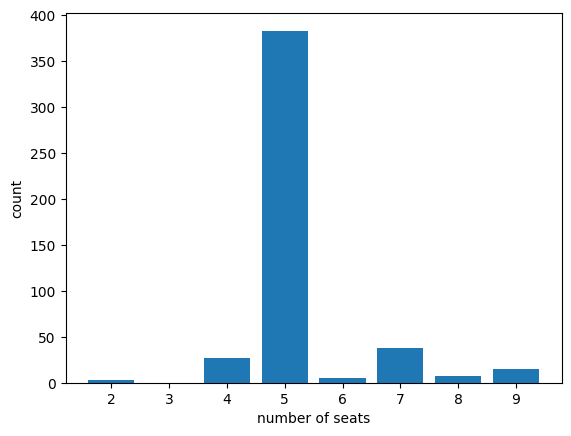

In [99]:
plt.bar(seats.index,seats)
plt.xlabel("number of seats")
plt.ylabel("count")
plt.show()

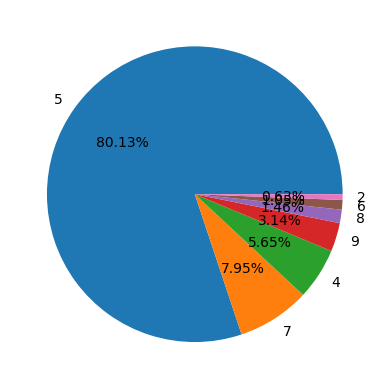

In [105]:
plt.pie(seats,labels = seats.index,autopct="%.2f%%")
plt.show()

In [107]:
data.segment.value_counts()

segment
JC - Medium          91
JD - Large           58
F - Luxury           51
N - Passenger Van    47
JB - Compact         44
C - Medium           34
E - Executive        30
JF - Luxury          30
B - Compact          29
JE - Executive       28
D - Large            28
A - Mini              3
JA - Mini             2
G - Sports            2
I - Luxury            1
Name: count, dtype: int64

In [117]:
segments = {}
for segment,grouped in data.groupby("segment"):
     segments[segment] = grouped.efficiency_wh_per_km

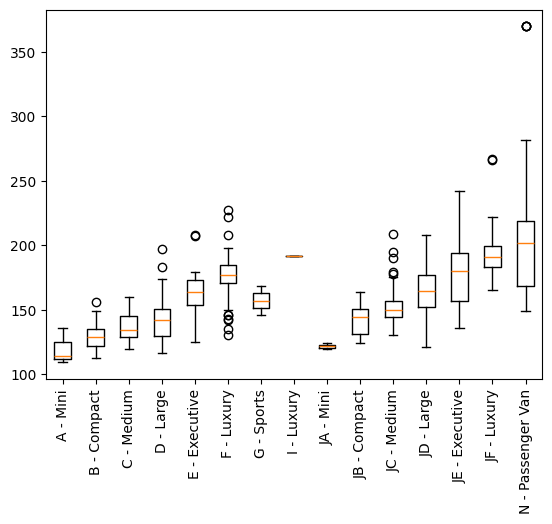

In [125]:
plt.boxplot(segments.values())
plt.xticks(rotation=90)
plt.gca().set_xticklabels(segments.keys())
plt.show()

In [129]:
data.seats.value_counts(dropna=False)


seats
5    383
7     38
4     27
9     15
8      7
6      5
2      3
Name: count, dtype: int64

In [132]:
seats = {}
for seat,grouped in data.groupby("seats"):
    seats[seat] = grouped.efficiency_wh_per_km

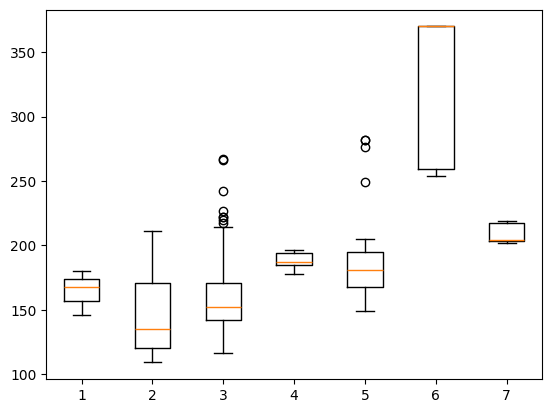

In [133]:
plt.boxplot(seats.values())
plt.show()

## Dependancy on two variables

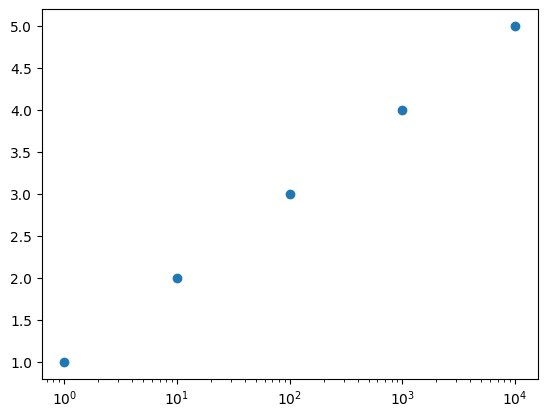

In [165]:
data1 = [1, 10, 100, 1000, 10000]
data2= [1, 2, 3, 4, 5]
plt.scatter(data1,data2)
plt.semilogx()
plt.show()